In [2]:
#!pip install -Uqq fastai

from fastai.vision.all import *
import numpy as np
import pandas as pd

In [3]:
#We will use the Pascal dataset for this model
path = untar_data(URLs.PASCAL_2007)
path.ls()

(#8) [Path('/root/.fastai/data/pascal_2007/test.json'),Path('/root/.fastai/data/pascal_2007/train.csv'),Path('/root/.fastai/data/pascal_2007/test'),Path('/root/.fastai/data/pascal_2007/valid.json'),Path('/root/.fastai/data/pascal_2007/train'),Path('/root/.fastai/data/pascal_2007/test.csv'),Path('/root/.fastai/data/pascal_2007/segmentation'),Path('/root/.fastai/data/pascal_2007/train.json')]

In [4]:
df = pd.read_csv(path/'train.csv')
df.head()

,fname,labels,is_valid
0,000005.jpg,chair,True
1,000007.jpg,car,True
2,000009.jpg,horse person,True
3,000012.jpg,car,False
4,000016.jpg,bicycle,True


In [17]:
pascal = DataBlock(blocks=(ImageBlock, MultiCategoryBlock),
                splitter=ColSplitter('is_valid'),
                get_x=ColReader('fname', pref=str(path/'train') + os.path.sep),
                get_y=ColReader('labels', label_delim=' '),
                item_tfms=Resize(460),
                batch_tfms=aug_transforms(size=224))

dls = pascal.dataloaders(df)

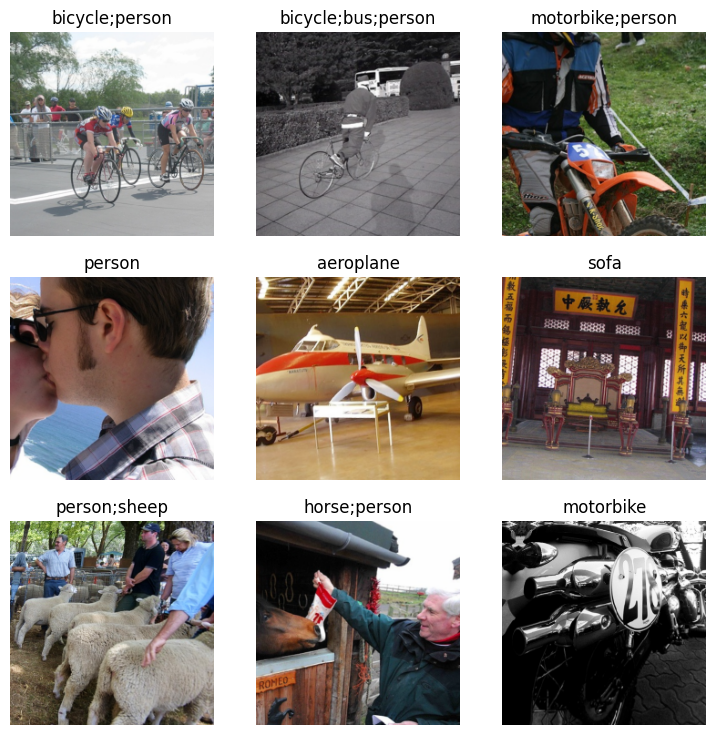

In [18]:
dls.show_batch()

The F1 score can be interpreted as a harmonic mean of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.

In [19]:
f1_macro = F1ScoreMulti(thresh=0.5, average='macro')
f1_macro.name = 'F1(macro)'

f1_samples = F1ScoreMulti(thresh=0.5, average='samples')
f1_samples.name = 'F1(samples)'

learn = vision_learner(dls, resnet50, metrics=[partial(accuracy_multi, thresh=0.5), f1_macro, f1_samples])

SuggestedLRs(valley=0.0010000000474974513)

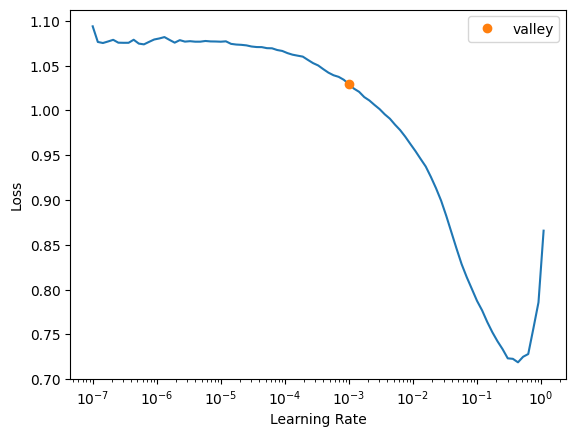

In [20]:
learn.lr_find()

In [21]:
learn.fine_tune(10, 0.001)

epoch,train_loss,valid_loss,accuracy_multi,F1(macro),F1(samples),time
0,0.921583,0.633697,0.668605,0.280933,0.304564,00:33


epoch,train_loss,valid_loss,accuracy_multi,F1(macro),F1(samples),time
0,0.766802,0.600699,0.693924,0.297853,0.323421,00:39
1,0.728883,0.539112,0.751912,0.342558,0.376040,00:39
2,0.663550,0.455821,0.830000,0.419296,0.491022,00:39
3,0.573129,0.349570,0.913187,0.565028,0.663799,00:39
4,0.470567,0.263908,0.952390,0.701741,0.784201,00:39
5,0.383395,0.203493,0.965896,0.768952,0.822170,00:39
6,0.309036,0.171558,0.971593,0.800881,0.841122,00:38
7,0.262255,0.150561,0.973905,0.817099,0.848471,00:39
8,0.229065,0.145144,0.974263,0.820109,0.851376,00:39
9,0.212729,0.142688,0.974801,0.819295,0.850826,00:38


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


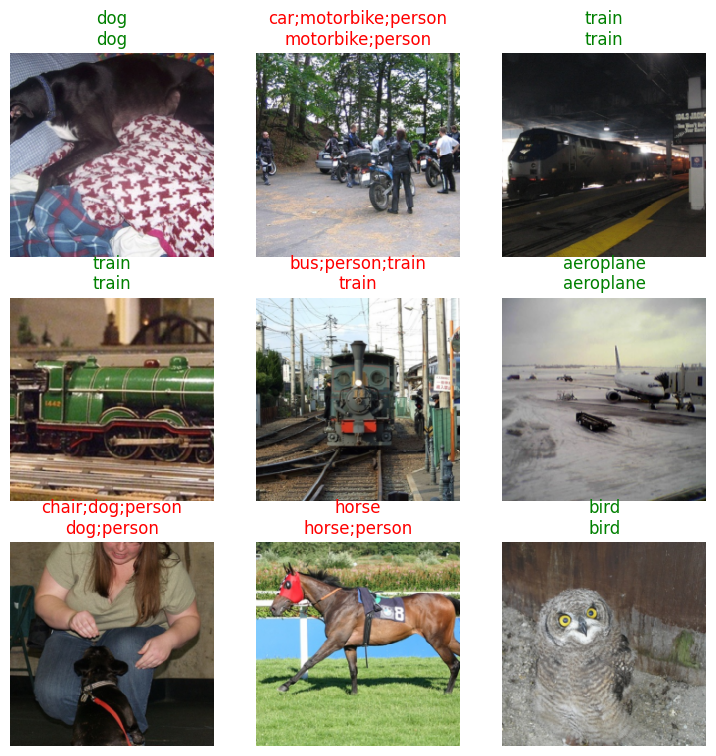

In [24]:
learn.show_results()

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


,target,predicted,probabilities,loss
0,sheep,bird;sheep,"tensor([0.0445, 0.0432, 1.0000, 0.0206, 0.0208, 0.0756, 0.0097, 0.0085, 0.0349,\n 0.1341, 0.1316, 0.0580, 0.0624, 0.0522, 0.0026, 0.0332, 0.6790, 0.0484,\n 0.1294, 0.0848])",0.8496007323265076
1,cow,horse;person,"tensor([0.1420, 0.0393, 0.0152, 0.0655, 0.1423, 0.1683, 0.0416, 0.0313, 0.0647,\n 0.3776, 0.1009, 0.0348, 0.9962, 0.1471, 0.9943, 0.1058, 0.0527, 0.0707,\n 0.0388, 0.1160])",0.6589636206626892
2,bus;person,bus;car,"tensor([0.0667, 0.0757, 0.0396, 0.0663, 0.1011, 0.9707, 1.0000, 0.0368, 0.0352,\n 0.0536, 0.0860, 0.0999, 0.0630, 0.1221, 0.3519, 0.1013, 0.0465, 0.0410,\n 0.0447, 0.0814])",0.6339951753616333
3,car,bicycle;person,"tensor([0.0762, 0.5776, 0.0438, 0.0502, 0.0369, 0.0745, 0.1417, 0.0306, 0.0367,\n 0.1060, 0.0965, 0.0689, 0.0769, 0.1049, 0.9973, 0.1295, 0.1365, 0.1129,\n 0.0828, 0.1386])",0.510877788066864
4,bicycle;person,car;motorbike;person,"tensor([0.1155, 0.1065, 0.1567, 0.1334, 0.1101, 0.1775, 0.9544, 0.0706, 0.1181,\n 0.0819, 0.1639, 0.0540, 0.2221, 0.9215, 0.9670, 0.0451, 0.1997, 0.0821,\n 0.0923, 0.0923])",0.49858465790748596
5,chair;person,chair;sofa,"tensor([0.0769, 0.0603, 0.0571, 0.1480, 0.0855, 0.0327, 0.1671, 0.0290, 0.8448,\n 0.0695, 0.0569, 0.0580, 0.1114, 0.1337, 0.0392, 0.2036, 0.0815, 0.9876,\n 0.2078, 0.2369])",0.4879257380962372
6,sofa;tvmonitor,chair;person;sofa;tvmonitor,"tensor([0.0551, 0.3753, 0.0449, 0.1225, 0.0832, 0.1832, 0.0258, 0.0339, 0.9004,\n 0.1087, 0.2077, 0.0642, 0.0669, 0.0425, 0.9925, 0.4065, 0.0630, 0.9499,\n 0.0830, 0.8236])",0.4846850335597992
7,cat;chair;person;pottedplant,dog;person;sofa;tvmonitor,"tensor([0.0547, 0.1288, 0.1214, 0.0750, 0.1478, 0.1431, 0.0384, 0.3481, 0.2812,\n 0.0915, 0.1157, 0.8344, 0.1199, 0.2355, 0.9959, 0.3395, 0.2258, 0.8201,\n 0.1291, 0.5133])",0.4703228175640106
8,diningtable,chair;diningtable;sofa,"tensor([0.0898, 0.1430, 0.0644, 0.0805, 0.1270, 0.1080, 0.0399, 0.0348, 0.9891,\n 0.1107, 0.6712, 0.1121, 0.1177, 0.0932, 0.0397, 0.1688, 0.1364, 0.8864,\n 0.1188, 0.1832])",0.4486854672431946


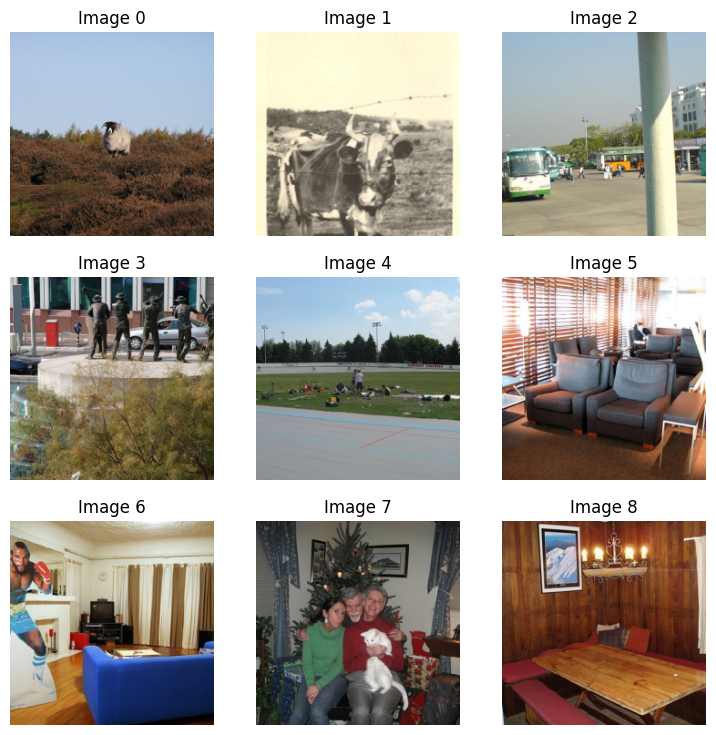

In [25]:
interp = Interpretation.from_learner(learn)
interp.plot_top_losses(9)

In [27]:
learn.export()

In [28]:
path=Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]